In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scanpy as sc
import anndata

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
adata = anndata.read_h5ad('2 filtered_normalised_scaled_centered_hum_0829.h5ad')
sc.tl.pca(adata, use_highly_variable=True, svd_solver='arpack', n_comps=32, random_state=42)
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=10, random_state=0)

computing PCA
    on highly variable genes
    with n_comps=32
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 16 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:02)
computing tSNE
    using 'X_pca' with n_pcs = 10
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:33)


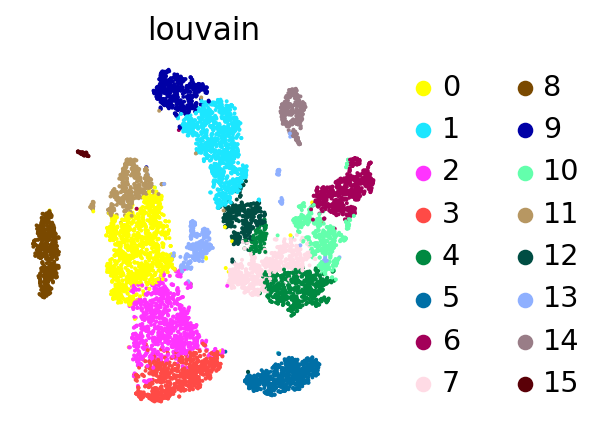

In [14]:
sc.tl.louvain(adata, resolution=1.1)
sc.tl.tsne(adata,n_pcs=10,random_state=0)
sc.pl.tsne(adata,color='louvain')

In [15]:
adata.write_h5ad('3 clustered_hum_0831_16.h5ad')

In [3]:
adata = anndata.read_h5ad('2 filtered_normalised_scaled_centered_hum_0829.h5ad')

In [4]:
sc.tl.pca(adata, use_highly_variable=True, svd_solver='arpack', n_comps=32, random_state=0)

computing PCA
    on highly variable genes
    with n_comps=32
    finished (0:00:04)


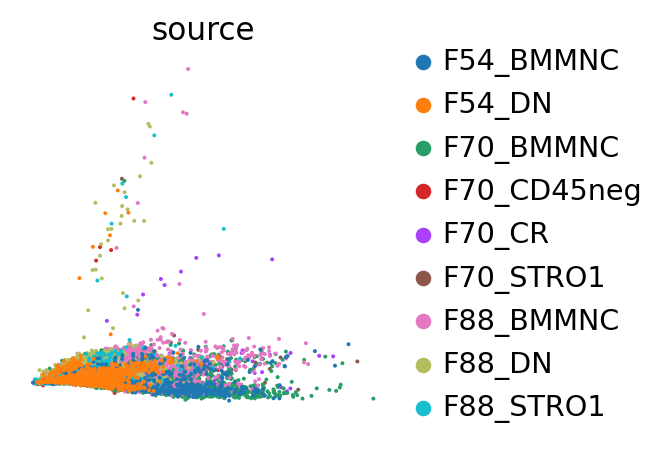

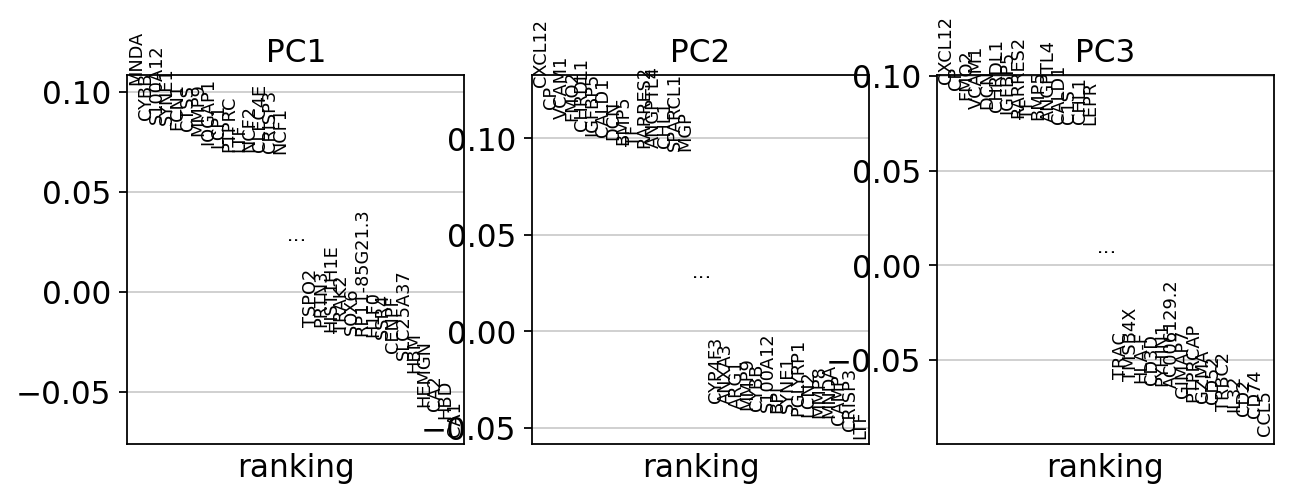

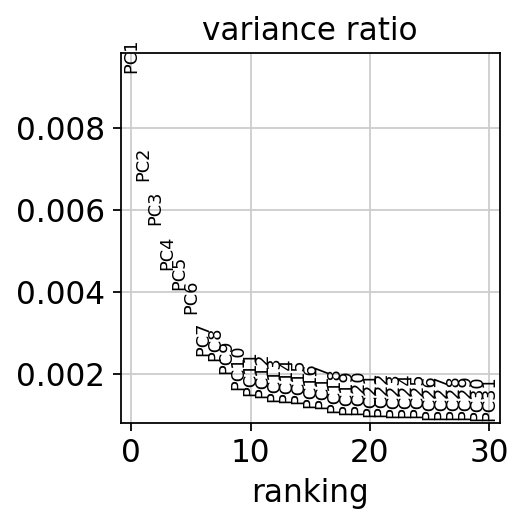

In [5]:
sc.pl.pca_overview(adata,color='source')

In [6]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=10)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:24)


In [7]:
sc.tl.louvain(adata, resolution=1.0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:03)


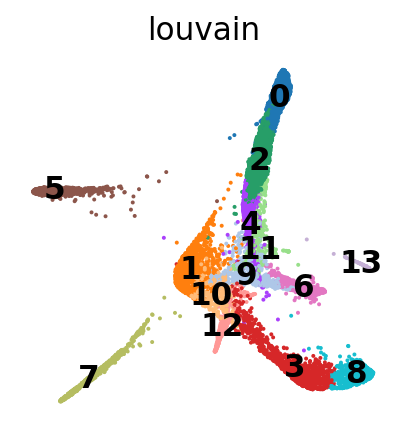

In [8]:
sc.pl.draw_graph(adata,  color='louvain',legend_loc='on data')

In [9]:
sc.tl.paga(adata, groups='louvain')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


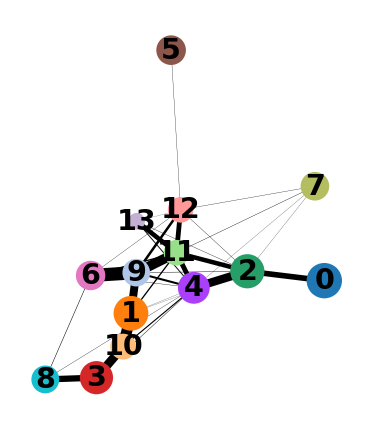

In [10]:
sc.pl.paga(adata, color=['louvain'])

In [11]:
adata.obs['louvain_anno'] = adata.obs['louvain']

In [5]:
adata.obs

,Specimen,Population,source,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,louvain
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzTCATGTCATACC,F70,CR,F70_CR,4845,4873,19555.0,1267.0,6.479161,11
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzCAACCTCCGCAT,F70,CR,F70_CR,5080,5115,20861.0,1447.0,6.936388,13
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzATTATTAAACAT,F70,CR,F70_CR,3304,3326,10172.0,690.0,6.783327,11
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzAGTCAACTCGGN,F70,CR,F70_CR,2271,2296,9153.0,592.0,6.467824,5
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzCCCGCCCGCCAT,F70,CR,F70_CR,1723,1745,6755.0,492.0,7.283494,11
...,...,...,...,...,...,...,...,...,...
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzAGATAAAGCCTT,F54,DN,F54_DN,240,246,320.0,15.0,4.687500,7
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzTCCTATTCAGTG,F54,DN,F54_DN,288,291,427.0,8.0,1.873536,4
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzTTCGACTGCAGC,F54,DN,F54_DN,351,359,514.0,14.0,2.723735,7
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzGCAGCAGTTTAA,F54,DN,F54_DN,674,683,1771.0,32.0,1.806889,3


In [13]:
adata

AnnData object with n_obs × n_vars = 9417 × 23714
    obs: 'Specimen', 'Population', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'louvain_anno'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'source_colors', 'pca', 'neighbors', 'draw_graph', 'louvain', 'louvain_colors', 'paga', 'louvain_sizes'
    obsm: 'X_pca', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

computing tSNE
    using 'X_pca' with n_pcs = 10
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:14)


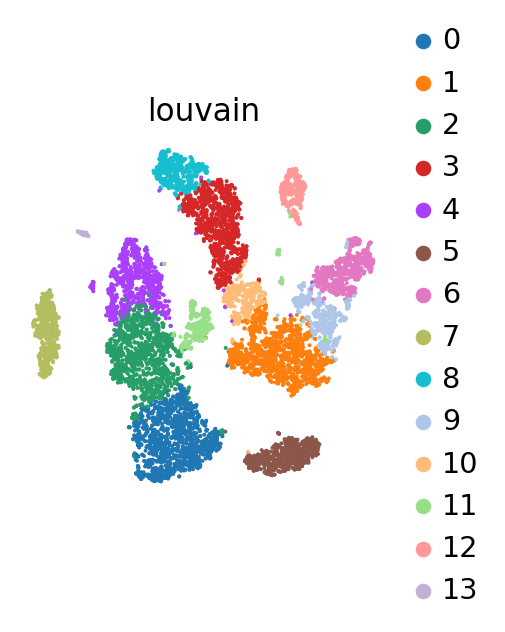

In [14]:
sc.tl.tsne(adata,n_pcs=10)
sc.pl.tsne(adata,color='louvain')

In [15]:
adata

AnnData object with n_obs × n_vars = 9417 × 23714
    obs: 'Specimen', 'Population', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'louvain_anno'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'source_colors', 'pca', 'neighbors', 'draw_graph', 'louvain', 'louvain_colors', 'paga', 'louvain_sizes', 'tsne'
    obsm: 'X_pca', 'X_draw_graph_fa', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [16]:
adata.write_h5ad('3 clustered_hum_0829_14.h5ad')

In [3]:
adata = sc.read_h5ad('3 clustered_hum_0831_16.h5ad')

In [8]:
anno = pd.read_csv('hum_anno.txt', delimiter='\t')
anno['Cluster'] = anno['Cluster'].astype('int64')
anno

,Cluster,CellType,Dev_Branch,DPcolor,CellLabel
0,0,Erythroblasts,Erythropoieisis,'#b02f16',9
1,1,Myelocytes,Granulopoieisis,'#6655a1',5
2,2,Erythroblasts,Erythropoieisis,'#df583c',9
3,3,Erythroblasts,Erythropoieisis,'#c03d23',9
4,4,Myeloblasts,Granulopoieisis,'#7570b3',4
5,5,Pre-B,Lymphopoieisis,'#8b4f4c',11
6,6,Monocytes,Granulopoieisis,'#6f277b',3
7,7,Myeloblasts,Granulopoieisis,NaN,4
8,8,T-NK,Lymphopoieisis,'#e6ab02',12
9,9,Neutrophils,Granulopoieisis,'#5643ad',6


In [5]:
adata.obs

,Specimen,Population,source,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,louvain
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzTCATGTCATACC,F70,CR,F70_CR,4845,4873,19555.0,1267.0,6.479161,11
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzCAACCTCCGCAT,F70,CR,F70_CR,5080,5115,20861.0,1447.0,6.936388,13
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzATTATTAAACAT,F70,CR,F70_CR,3304,3326,10172.0,690.0,6.783327,11
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzAGTCAACTCGGN,F70,CR,F70_CR,2271,2296,9153.0,592.0,6.467824,5
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzCCCGCCCGCCAT,F70,CR,F70_CR,1723,1745,6755.0,492.0,7.283494,11
...,...,...,...,...,...,...,...,...,...
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzAGATAAAGCCTT,F54,DN,F54_DN,240,246,320.0,15.0,4.687500,7
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzTCCTATTCAGTG,F54,DN,F54_DN,288,291,427.0,8.0,1.873536,4
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzTTCGACTGCAGC,F54,DN,F54_DN,351,359,514.0,14.0,2.723735,7
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzGCAGCAGTTTAA,F54,DN,F54_DN,674,683,1771.0,32.0,1.806889,3


In [9]:
adata.obs['Cluster'] = adata.obs['louvain']
adata.obs = adata.obs.astype({'Cluster': 'int64'})

In [10]:
adata.obs = adata.obs.merge(anno, on='Cluster', how='left')

/home/lh3n19/.conda/envs/my/lib/python3.8/site-packages/anndata/_core/anndata.py:794: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [13]:
adata.obs['CellLabel'] = adata.obs['CellLabel'].astype('category')

In [14]:
adata.obs.dtypes

Specimen             category
Population           category
source               category
n_genes                 int64
n_genes_by_counts       int32
total_counts          float32
total_counts_mt       float32
pct_counts_mt         float32
louvain              category
Cluster                 int64
CellType               object
Dev_Branch             object
DPcolor                object
CellLabel            category
dtype: object

/home/lh3n19/.conda/envs/my/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CellType' as categorical
/home/lh3n19/.conda/envs/my/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Dev_Branch' as categorical
/home/lh3n19/.conda/envs/my/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a futu

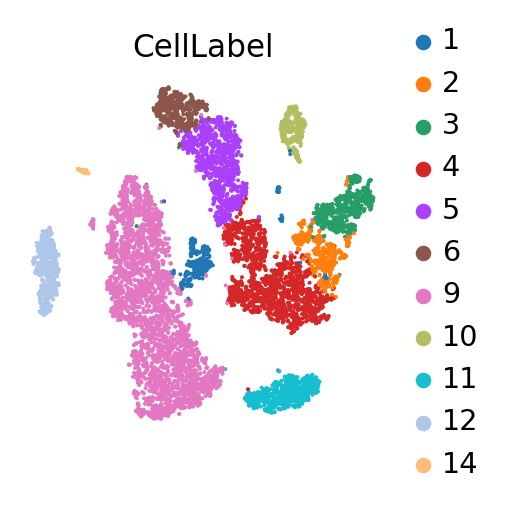

In [15]:
sc.pl.tsne(adata,color='CellLabel')

(array([ 801.,  611., 1596., 1023.,  479.,    0., 3363.,  328.,  625.,
         542.,   49.]),
 array([ 1.        ,  2.18181818,  3.36363636,  4.54545455,  5.72727273,
         6.90909091,  8.09090909,  9.27272727, 10.45454545, 11.63636364,
        12.81818182, 14.        ]),
 <BarContainer object of 11 artists>)

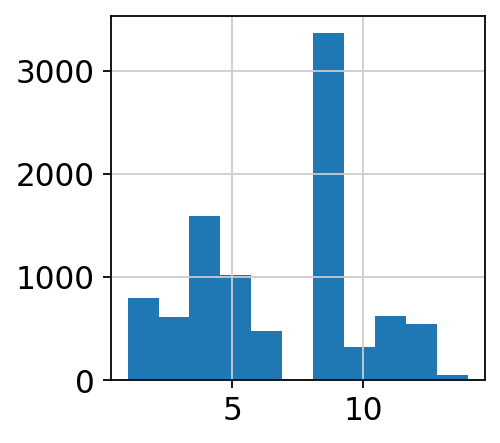

In [16]:
plt.hist(adata.obs.CellLabel,bins=11)

In [17]:
adata.write_h5ad('3 clustered_hum_0831_anno.h5ad')